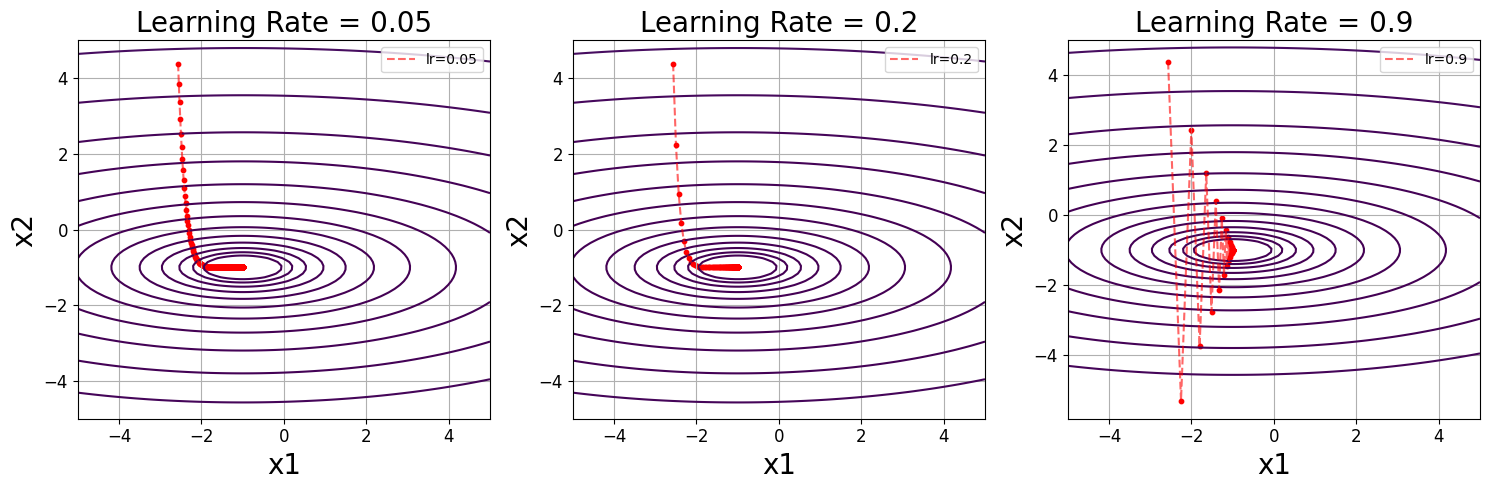

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 定义目标函数
def f(x1, x2):
    return ((x1 + 1)**2)/9 + (x2 + 1)**2

# 定义目标函数的梯度
def gradient_f(x1, x2):
    grad_x1 = 2/9 * (x1 + 1)
    grad_x2 = 2 * (x2 + 1)
    return grad_x1, grad_x2

# 定义梯度下降算法
def gradient_descent(initial_x1, initial_x2, learning_rate, num_iterations):
    x1 = initial_x1
    x2 = initial_x2
    history = [(x1, x2)]
    for i in range(num_iterations):
        grad_x1, grad_x2 = gradient_f(x1, x2)
        x1 -= learning_rate * grad_x1
        x2 -= learning_rate * grad_x2
        history.append((x1, x2))
    return history

# 设置初始解和迭代次数
initial_x1 = np.random.rand() * 10 - 5
initial_x2 = np.random.rand() * 10 - 5
num_iterations = 1000

# 生成网格点用于绘制等高线图
x1_grid, x2_grid = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
z = f(x1_grid, x2_grid)

# 设置不同的学习率
learning_rates = [0.05, 0.2, 0.9]

# 创建子图
fig, axs = plt.subplots(1, len(learning_rates), figsize=(15, 5))

# 绘制每个学习率下的优化路径
for i, lr in enumerate(learning_rates):
    # 运行梯度下降算法
    history = gradient_descent(initial_x1, initial_x2, lr, num_iterations)
    # 提取历史解
    x1_history = [h[0] for h in history]
    x2_history = [h[1] for h in history]
    # 绘制优化路径和等高线图
    axs[i].contour(x1_grid, x2_grid, z, levels=np.logspace(-1, 3, 20))
    axs[i].plot(x1_history, x2_history, 'r--', alpha=0.6, label=f'lr={lr}')
    axs[i].scatter(x1_history, x2_history, c='r', s=10)
    axs[i].set_xlabel('x1',fontsize=20)
    axs[i].set_ylabel('x2',fontsize=20)
    axs[i].tick_params(axis='both', which='major', labelsize=12)  # 增加刻度标签字体大小
    axs[i].set_title(f'Learning Rate = {lr}',fontsize=20)
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.show()
